# Introduction to Machine Learning: Supervised Learning


## Final Project - Analyzing High School Students Performance

## Table Of Content:
* [Introduction](#Introduction)
* [Objectives](#Objectives)
* [Dataset Overview](#Dataset-Overview)
* [Data Preperation And Visualization](#Data-Preperation-And-Visualization)
* [EDA](#EDA)
* [Models](#Models)
    * [Decision Tree Classifier](#DecisionTreeClassifier)
        * [Grid Search with Decision Tree Classifier](#Grid-Search-with-Decision-Tree-Classifier)
    * [SVM](#SVM)
        * [Grid Search with SVM](#Grid-Search-with-Decision-Tree-Classifier)
    * [Neural Network](#Neural-Network)
* [Conclusion](#Conclusion)
* [References](#References)

## Introduction

In this project I will be walking you through the Students Performance Dataset that I got from Kaggle.

This dataset includes detailed records of 2,392 students, encompassing a broad spectrum of variables such as demographics, study habits, parental involvement, extracurricular activities, and academic performance. The focus of my analysis is the GradeClass variable, which categorizes students' grades, offering a structured approach to evaluate educational outcomes.

### Project links
    
[Dataset used in this project](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data)

[GitHub repository of this project](https://github.com/ammarhameed/DTSA-5509)



## Objectives

- Identify Key Factors: Determine the most influential factors affecting the grades of the students.
- Predictive Modeling: Develop multiple predictive models using supervised machine learning methods to predict academic performance based on the predictor variables.
- Insights and Recommendations: Provide actionable insights and recommendations for educators, parents.

## Dataset Overview
#### Demographic Details
- Age: Ranges from 15 to 18 years.
- Gender: Encoded as 0 for Male and 1 for Female.
- Ethnicity: Categorized as Caucasian, African American, Asian, and Other.
- Parental Education: Ranges from None to Higher education levels.
#### Study Habits
- Weekly Study Time: From 0 to 20 hours.
- Absences: Number of absences, ranging from 0 to 30.
- Tutoring: Indicates whether the student receives tutoring (Yes/No).
- Parental Involvement
#### Parental Support: Levels of support, from None to Very High.
- Extracurricular Activities
- Participation in extracurricular activities, sports, music, and volunteering (Yes/No).
#### Academic Performance
- GPA: Grade Point Average, ranging from 2.0 to 4.0.
- GradeClass: Classification based on GPA, ranging from 'A' (GPA ≥ 3.5) to 'F' (GPA < 2.0).

## Data Preperation And Visualization

In [26]:
import zipfile
import os

zip_file_path = 'archive.zip'
extract_to_path = 'extracted_files'

if not os.path.exists(extract_to_path):
    os.makedirs(extract_to_path)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f'Files extracted to: {extract_to_path}')


Files extracted to: extracted_files


In [27]:
import pandas as pd

csv_file_path = 'extracted_files/Student_performance_data _.csv'  
df = pd.read_csv(csv_file_path)

In [28]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [30]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [31]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

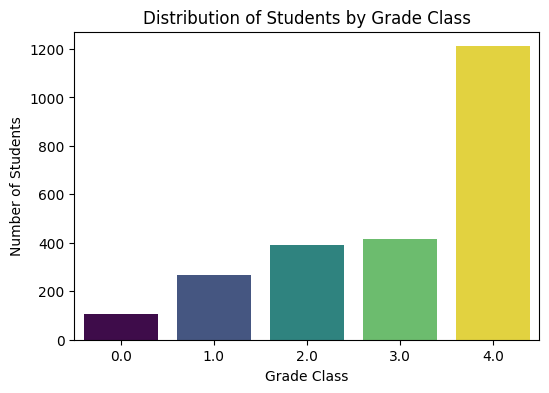

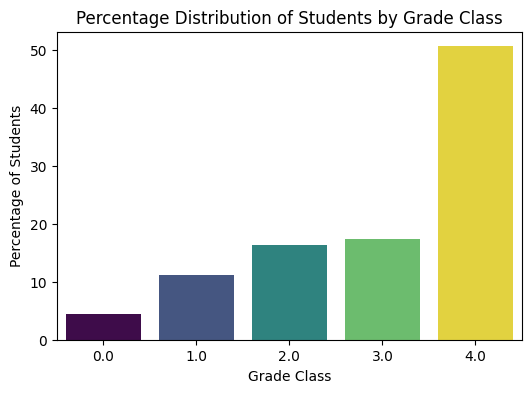

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.countplot(x='GradeClass', hue='GradeClass', data=df, palette='viridis', legend=False)
plt.title('Distribution of Students by Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Number of Students')
plt.show()

grade_class_counts = df['GradeClass'].value_counts(normalize=True) * 100
grade_class_percentages = grade_class_counts.reset_index()
grade_class_percentages.columns = ['GradeClass', 'Percentage']
plt.figure(figsize=(6, 4))
sns.barplot(x='GradeClass', y='Percentage', hue='GradeClass', data=grade_class_percentages, palette='viridis', dodge=False, legend=False)
plt.title('Percentage Distribution of Students by Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Percentage of Students')
plt.show()

In [33]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [65]:
df['GPA'].value_counts()

GPA
0.000000    16
4.000000     7
2.929196     1
2.527607     1
2.167615     1
            ..
1.687900     1
2.952146     1
0.963375     1
3.334972     1
2.140014     1
Name: count, Length: 2371, dtype: int64

##### Data Cleaning
The data doesn't have missing values which is good, but I noticed something alarming, which is the data isn't well balances, as you can see
in the graphs above, the grades distribution is not uniformly distributed, grade 4.0 alone counts for 50% of the data.

Traning the model on such data will lead to bad performant models, for this reason we'll need to create a new dataset that has balanced data.

The way I'm approaching this is by creating a dataset that has two GPAs only, 3.0 and 4.0, to transform this problem to a binary classification problem.

In [34]:
def categorize_grade(grade):
    if grade <= 3.0:
        return 0
    else:
        return 1

# Create a new column 'HighAchiever'
df['HighAchiever'] = df['GradeClass'].apply(categorize_grade)
df.to_csv('extracted_files/students_performance_updated.csv', index=False)

In [35]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,HighAchiever
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,1


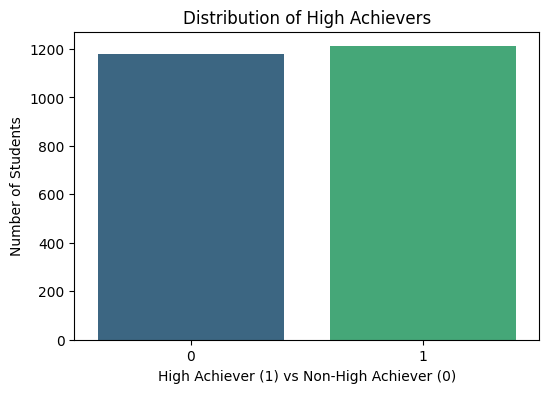

In [36]:
df['HighAchiever'] = df['GradeClass'].apply(categorize_grade)
plt.figure(figsize=(6, 4))
sns.countplot(x='HighAchiever', hue='HighAchiever', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Distribution of High Achievers')
plt.xlabel('High Achiever (1) vs Non-High Achiever (0)')
plt.ylabel('Number of Students')
plt.show()

Looks much better now! 

Let's jump into the EDA section.

## EDA

##### Distribution of Age

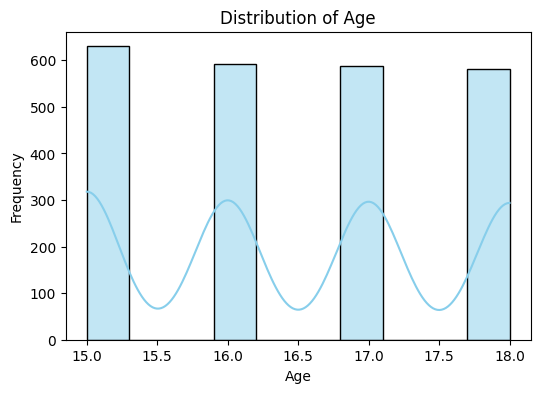

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


##### Distribution of Absences

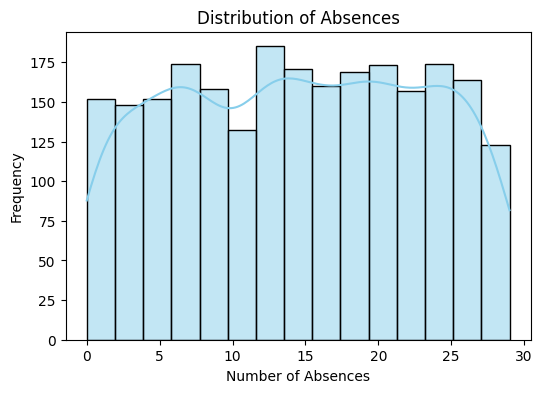

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Absences'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.show()

##### Count plot of Tutoring

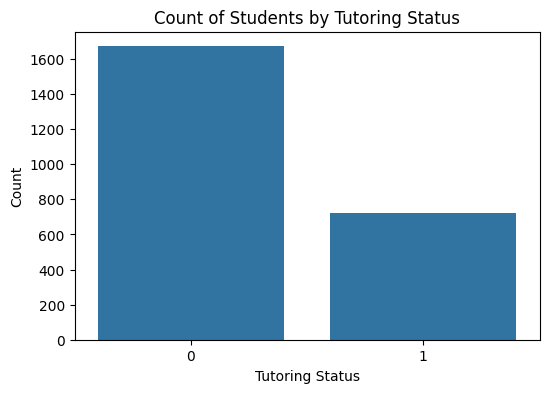

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Tutoring', data=df)
plt.title('Count of Students by Tutoring Status')
plt.xlabel('Tutoring Status')
plt.ylabel('Count')
plt.show()


##### Plot of Parental Support


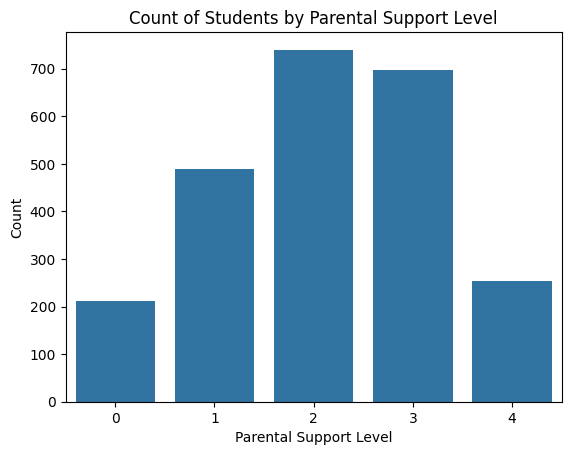

In [40]:
# plt.figure(figsize=(6, 4))
sns.countplot(x='ParentalSupport', data=df)
plt.title('Count of Students by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('Count')
plt.show()


##### Plot of Extracurricular


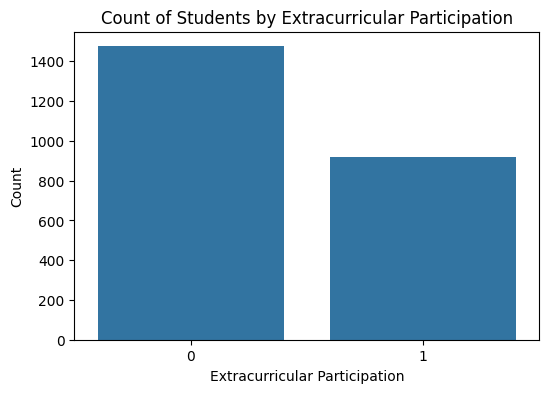

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Extracurricular', data=df)
plt.title('Count of Students by Extracurricular Participation')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Count')
plt.show()

##### Plot of Sports


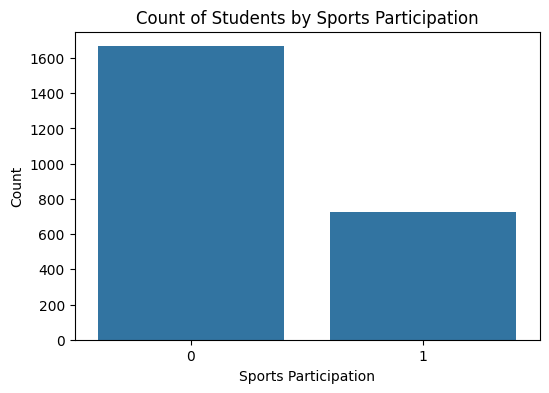

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sports', data=df)
plt.title('Count of Students by Sports Participation')
plt.xlabel('Sports Participation')
plt.ylabel('Count')
plt.show()

##### Plot of Music


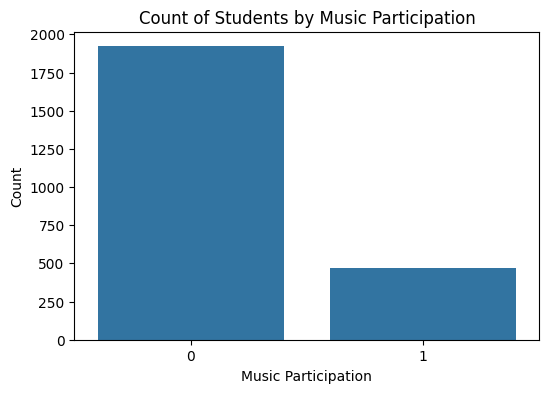

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Music', data=df)
plt.title('Count of Students by Music Participation')
plt.xlabel('Music Participation')
plt.ylabel('Count')
plt.show()

##### Plot of Volunteering


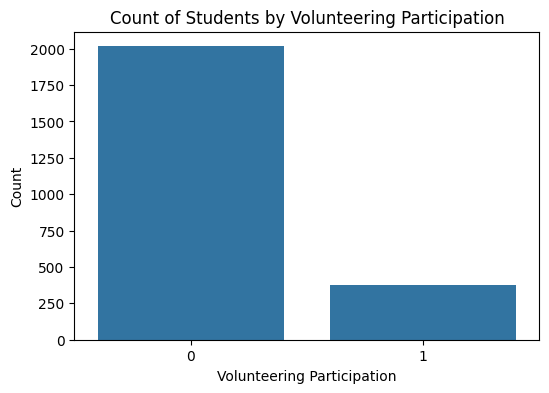

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Volunteering', data=df)
plt.title('Count of Students by Volunteering Participation')
plt.xlabel('Volunteering Participation')
plt.ylabel('Count')
plt.show()

##### Distribution of GPA


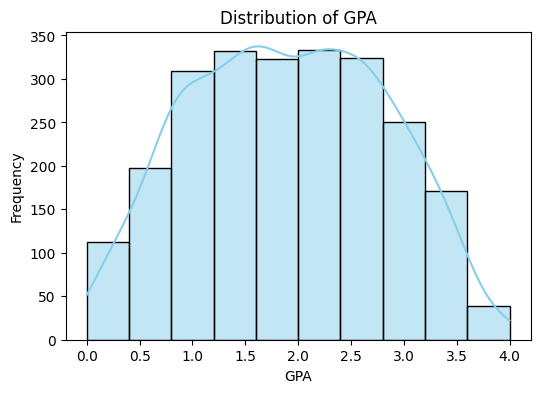

In [45]:
plt.figure(figsize=(6, 4))
sns.histplot(df['GPA'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

##### Plot of GradeClass


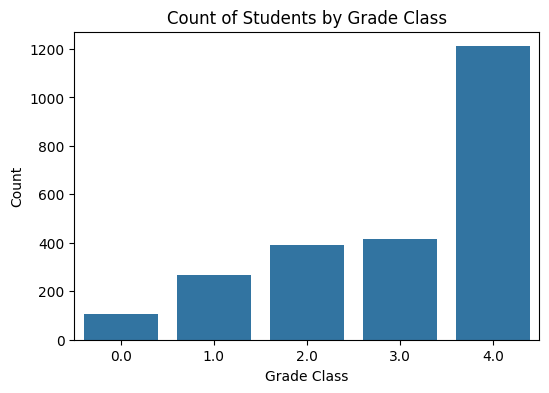

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x='GradeClass', data=df)
plt.title('Count of Students by Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Count')
plt.show()


#####  Correlation Heatmap  


In the next graph I wanted to go through the **Correlation Heatmap** to get some sense of the correlation between the variables, one feature jumps out which is Absense, it's negativly correlated with GPA which makes perfect sense.


We need to be carefull with the GradeClass and GPA here, since they are basically the same thing, they will be highly correlated, so if we'll need to drop one of them when when trying to predict the other one. 

It won't be a problem here though since I'll be dropping both and will be using the new variable that I created which is called **HighAchiever**

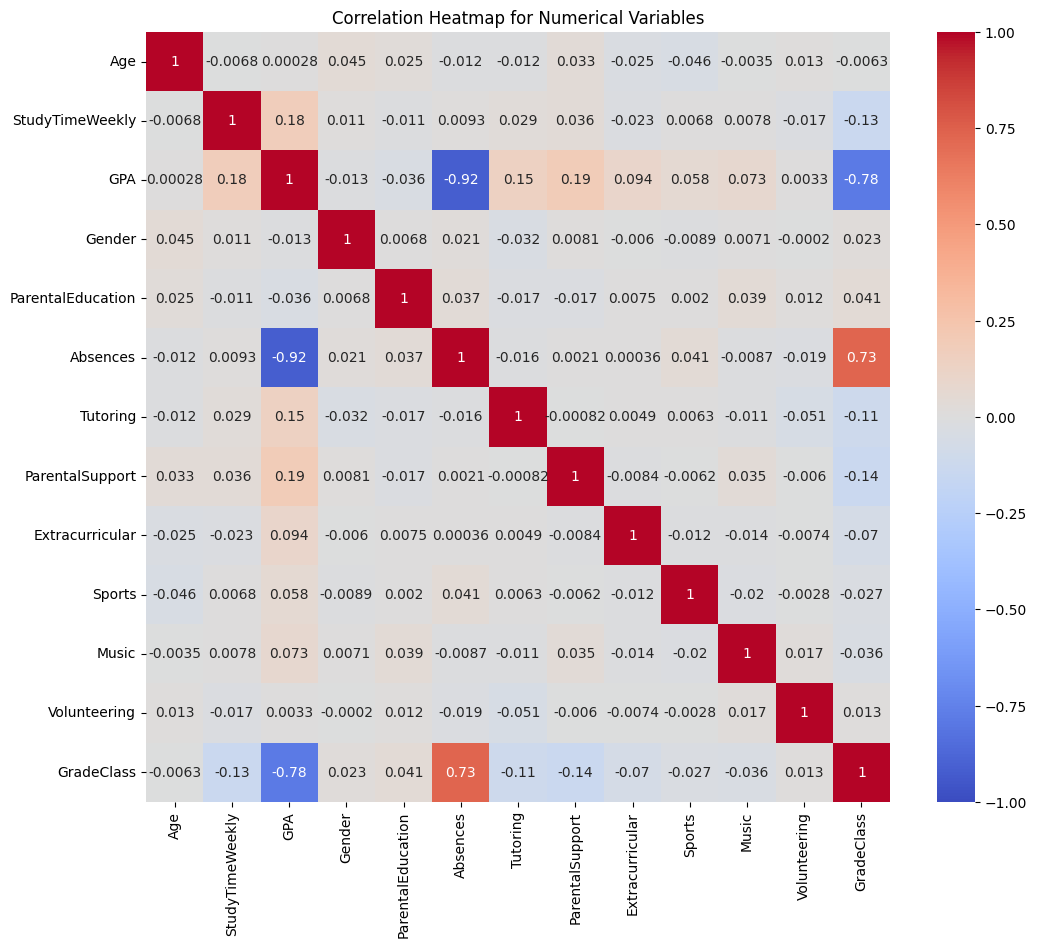

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Age', 'StudyTimeWeekly', 'GPA', 'Gender', 
                'ParentalEducation', 'Absences', 'Tutoring', 'ParentalSupport', 
                'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

##### Pairplot for selected numerical variables


In the next graph I chose to go with the following features as all the rest weren't useful, and it also took long time.

We can see here that Absences is highly correlated with the GPA, the more absences a student have the lower the GPA

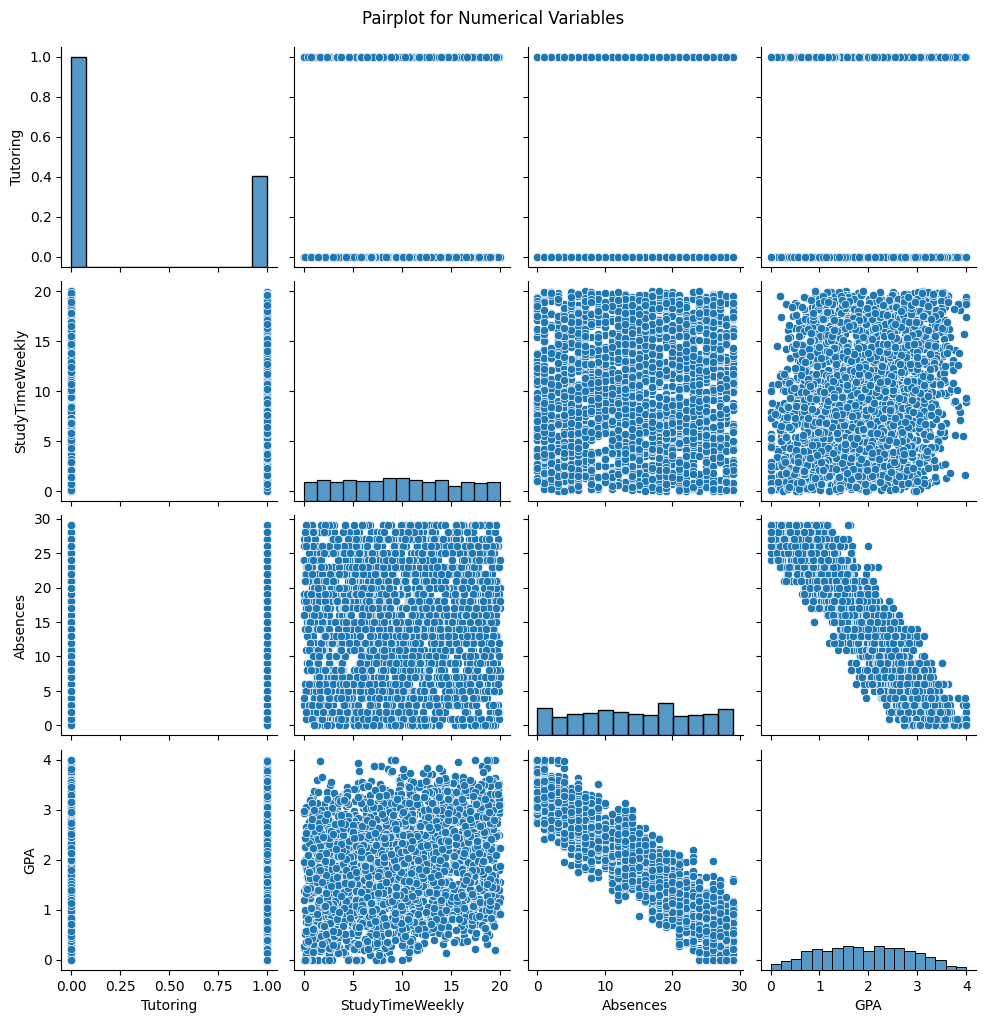

In [48]:
sns.pairplot(df[['Tutoring', 'StudyTimeWeekly', 'Absences', 'GPA']], kind='scatter', diag_kind='hist')
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()

#### Pie Charts

The following cell generates two pie charts using a muted color palette to visualize the distribution of students across different grade classes and genders.

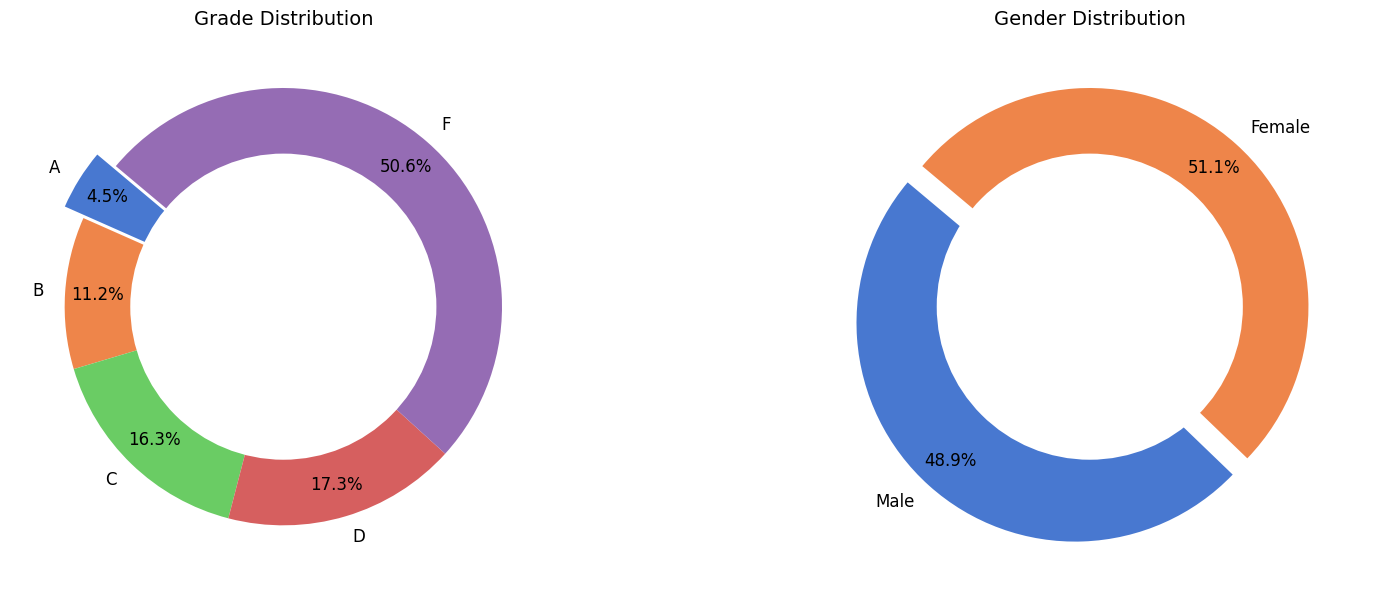

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

pastel_colors = sns.color_palette('muted')

def plot_pie_chart(ax, data, column, labels, title, colors, explode_factor=0.1):
    value_counts = data[column].value_counts().sort_index()
    sizes = value_counts.values
    explode = [explode_factor] + [0] * (len(labels) - 1)
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors[:len(labels)],
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85,
        explode=explode
    )
    ax.set_title(title, fontsize=14)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    for text in texts + autotexts:
        text.set_fontsize(12)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

plot_pie_chart(axes[0], df, 'GradeClass', ['A', 'B', 'C', 'D', 'F'], 'Grade Distribution', pastel_colors)
plot_pie_chart(axes[1], df, 'Gender', ['Male', 'Female'], 'Gender Distribution', pastel_colors)

plt.tight_layout()

plt.show()


## Models

#### DecisionTreeClassifier

Let's starting building the models now, the first one I chose to go with is the DecisionTreeClassifier from Sklearn

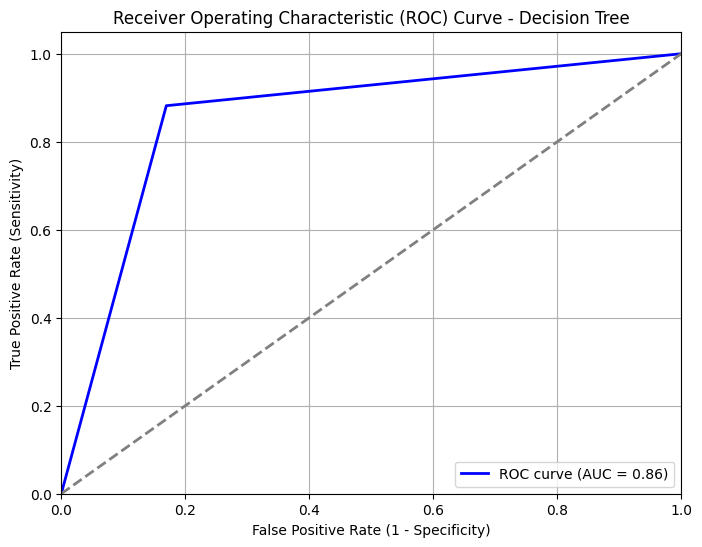

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Select features excluding GradeClass and GPA
X = df.drop(['HighAchiever', 'GradeClass', 'GPA'], axis=1)  # Features
y = df['HighAchiever']  # Target variable

# First, I'll split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then we need to to do feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_prob = dt_model.predict_proba(X_test_scaled)[:, 1]  

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Grid Search with Decision Tree Classifier

As you can see above the ROC is at 86%, while it's very good, we can defently do better, I'll be trying the GridSearchCV frvom SKlearn to see if I can find better features

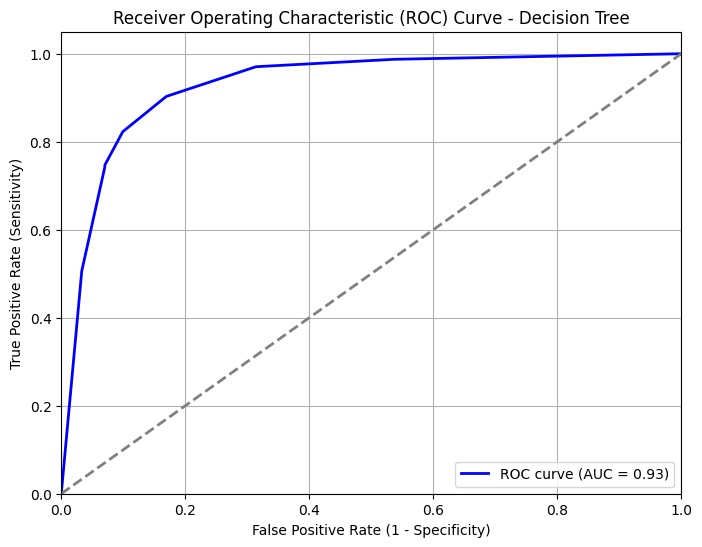

Best parameters found:  {'dt__max_depth': 3, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2, 'feature_selection__k': 5}
Selected features:  Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Music'], dtype='object')


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['StudentID','HighAchiever', 'GradeClass', 'GPA'], axis=1)  
y = df['HighAchiever']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Grid parameters
param_grid = {
    'feature_selection__k': [5, 10, 'all'],  # Number of features to select
    'dt__max_depth': [3, 5, 10, None],       # Maximum depth of the tree
    'dt__min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'dt__min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_prob = best_model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Best parameters found: ", grid_search.best_params_)
selected_features = X.columns[grid_search.best_estimator_.named_steps['feature_selection'].get_support()]
print("Selected features: ", selected_features)


That was very successfull, we can see the following features are the best 

- StudyTimeWeekly
- Absences
- Tutoring
- ParentalSupport
- Music


What I found very surprizing is **Music**, maybe it's something I need to learn to get better grades! 



#### SVM

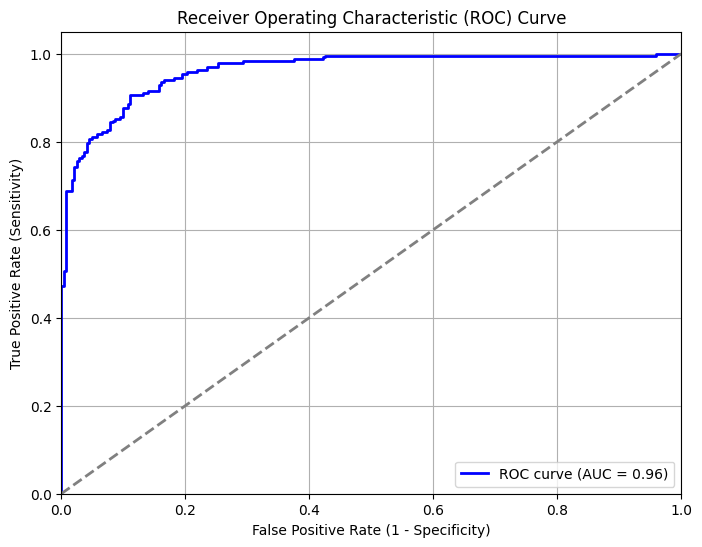

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['HighAchiever', 'GradeClass', 'GPA'], axis=1)   
y = df['HighAchiever']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier (choose appropriate kernel)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # Radial Basis Function kernel

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]   

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Grid Search with SVM

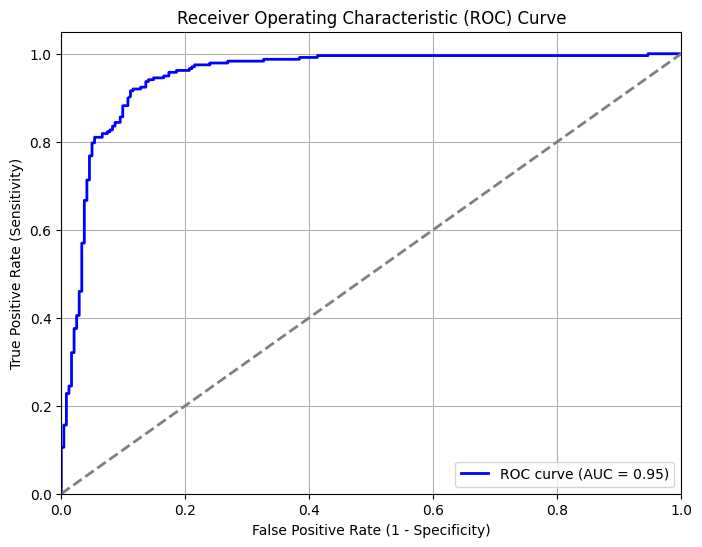

Best parameters found:  {'feature_selection__k': 'all', 'svm__C': 10, 'svm__gamma': 0.001}
Selected features:  Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')


In [53]:
X = df.drop(['StudentID', 'HighAchiever', 'GradeClass', 'GPA'], axis=1)  # Features
y = df['HighAchiever']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

param_grid = {
    'feature_selection__k': [5, 10, 'all'],  # Number of features to select
    'svm__C': [0.1, 1, 10],                  # Regularization parameter
    'svm__gamma': [0.001, 0.01, 0.1, 1]      # Kernel coefficient
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_prob = best_model.predict_proba(X_test)[:, 1]   

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Best parameters found: ", grid_search.best_params_)
selected_features = X.columns[grid_search.best_estimator_.named_steps['feature_selection'].get_support()]
print("Selected features: ", selected_features)


#### Neural Network
In the final section I would like to try a model that wasn't covered in the this class, which is Neural Network, it worked a bit better than SVM, but nothing significant really, but I thought of sharing it as a last fun attempt of a model that isn't covered yet.

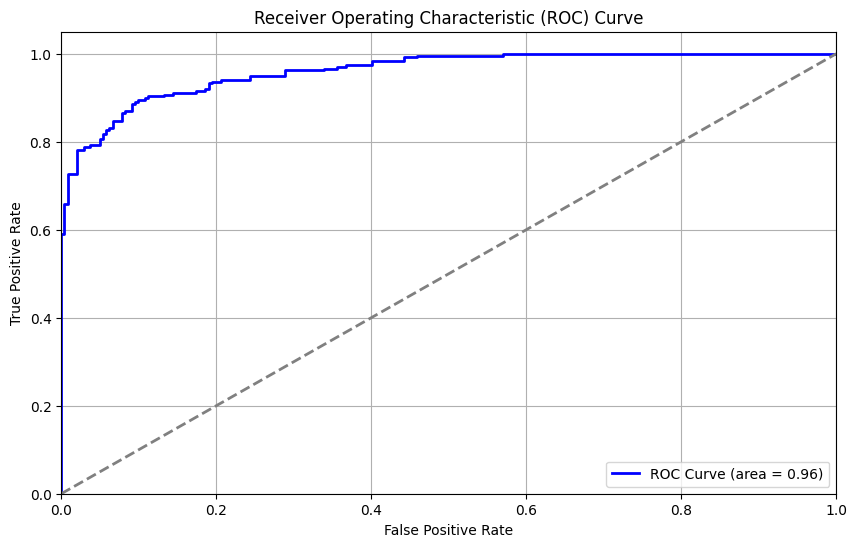

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

X = df.drop(['HighAchiever', 'GradeClass', 'GPA'], axis=1)   
y = df['HighAchiever']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), # Two hidden layers with 64 and 32 neurons
                          activation='relu',
                          solver='adam',
                          max_iter=200,
                          learning_rate_init=0.01,   
                          random_state=42)



mlp_model.fit(X_train_scaled, y_train)


y_pred = mlp_model.predict(X_test_scaled)
y_prob = mlp_model.predict_proba(X_test_scaled)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Conclusion 

In conclusion, in this project I've worked on the multiple aspects that can influence the high school students academic performance.

Through EDA, I have found several findings. Initially, the dataset revealed significant disparities in grade distribution, prompting the creation of a balanced dataset focused on high achievers, simplifying the predictive task to binary classification.

I've also decided to transorm the dataset into a binary classification problem to achieve two goals:

- Balance the dataset.
- Find meaningful difference between the two groups.

As for my finding about the dataset, I've found the following:

- Absence affects grades negatively. This is not a surprise.
    
- Music seems to have a positive effect. A bit surprising.

- The best parameters are: ***StudyTimeWeekly***, ***Absences***, ***Tutoring***, ***ParentalSupport***, ***Music***. I chose the intersection of what Grid Search has found from the SVM and Decision Tree Model.
    

Utilizing machine learning techniques like, Decision Tree Classifiers and SVM with and without GridSearchCV, and finally Neural Network has helped me figure out and get deep insight into how highschool pereformance can be enhanced. Notably, features like Weekly Study Time, Absences, Tutoring, Parental Support, and Music emerged as significant predictors, providing actionable insights for educators and parents alike.

Moving forward, there are several steps to further refine and expand on the findings from this project:

- ***Further Exploration of Features:*** We should dive deeper into how specific features can impact the performance of the student. For example, while I've found that absences negatively affect grades and music has a positive effect, it'd be beneficial to understand why these relationships exist and if they vary across different student demographics or academic levels.

- ***Feature Engineering:*** We could explore creating new features or combining existing ones to see if they offer better predictive power. For example, analyzing interactions between study time and parental support might reveal new insights.
- ***Model Improvement:*** Although I've used Decision Trees, SVM, and Neural Networks, we could explore additional models like Random Forests or Gradient Boosting to see if they offer better performance or more interpretability.
- ***More Data:*** Gathering additional data or incorporating more features could help enhance the accuracy of the model and provide a more understanding of factors affecting academic performance.
- ***Student Feedback:*** Collecting feedback from students about their experiences and the impact of different features could provide a more insight and it can also help validating the findings.

#### References

https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data